<a href="https://colab.research.google.com/github/Dikshya5058/AI-and-ML/blob/main/2461794_DikshyaChaulagain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Problem 1A: Single-Year HDI Exploration (Latest Year: 2022)

# Task 1: Extract Latest Year
- Identify unique years in the dataset
- Filter dataset for year 2022
- Save as `hdi_2022_df` for further tasks


In [ ]:

# Read dataset
data=pd.read_csv("/content/drive/MyDrive/Assignment - 1/Human_Development_Index_Dataset.csv",encoding="latin1")
# Filter for years 2020–2022


# Check unique years
print(f"Unique years:\n{data['year'].unique()}")

# Filter dataset for latest year (2022) and create a copy
hdi_2022_df=data[data["year"]==2022].copy()

# Save the filtered dataframe for subsequent tasks
hdi_2022_df.to_csv("hdi_2022_df.csv", index=False)


Unique years:
[1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019 2020 2021 2022]


# Task 2: Data Exploration
- Display first 10 rows
- Count rows and columns
- List all column names and data types

In [ ]:

# Display the first 10 rows
print("Filtered Dataset (first 10 rows):")
print(hdi_2022_df.head(10), "\n")

# Number of rows and columns
rows, cols = hdi_2022_df.shape
print(f"Number of rows and columns in 2022 dataset: {rows} x {cols}\n")

# Column names and data types
print("All column names and their data types:")
print(hdi_2022_df.dtypes)


Filtered Dataset (first 10 rows):
     Unnamed: 0 iso3              country  year    hdi  life_expectancy  \
32           33  AFG          Afghanistan  2022  0.462           62.879   
65           66  ALB              Albania  2022  0.789           76.833   
98           99  DZA              Algeria  2022  0.745           77.129   
131         132  AND              Andorra  2022  0.884           83.552   
164         165  AGO               Angola  2022  0.591           61.929   
197         198  ATG  Antigua and Barbuda  2022  0.826           79.236   
230         231  ARG            Argentina  2022  0.849           76.064   
263         264  ARM              Armenia  2022  0.786           73.372   
296         297  AUS            Australia  2022  0.946           83.579   
329         330  AUT              Austria  2022  0.926           82.412   

     pop_millions     hdi_f     hdi_m  life_expec_f  ...  gender_development  \
32      41.128771  0.332443  0.534145        66.213  ...    

# Task 3: Missing Values & Data Cleaning
- Check missing values and report
- Inspect for duplicates, text numeric issues, special characters
- Handle missing values: drop essential, impute non-essential

In [ ]:

missing_values=hdi_2022_df.isnull().sum()
print(f"Total count of missing values:\n\n{missing_values}\n\n")
print(f"Unique Country:\n\n {hdi_2022_df['country'].unique()}\n\n")
print(f"Duplicate Rows:\n\n{hdi_2022_df.duplicated().sum()}\n\n")
# Select object (text) columns
object_cols = hdi_2022_df.select_dtypes(include="object").columns

# Loop through object columns and see if "–" appears
for col in object_cols:
    if (hdi_2022_df[col] == "–").any():
        print(f"Column '{col}' contains special character '–'")

# Essential columns: drop rows if missing
essential_cols = ["hdi", "life_expectancy", "expec_yr_school", "mean_yr_school", "gross_inc_percap"]
hdi_2022_df = hdi_2022_df.dropna(subset=essential_cols)

# Non-essential columns: impute missing values with mean (for numeric columns)
non_essential_cols = [
    "hdi_f", "hdi_m", "expec_yr_school_f", "expec_yr_school_m",
    "mean_yr_school_f", "mean_yr_school_m", "gross_inc_percap_f", "gross_inc_percap_m",
    "gender_development", "gender_inequality",
    "secondary_education_f_%", "secondary_education_m_%",
    "seats_in_parliament_f_%", "seats_in_parliament_m_%",
    "labour_participation_f_%", "labour_participation_m_%",
    "co2_emission_tons", "mat_footprint_percap_tons"
]

# Fill NaN in non-essential numeric columns with column mean
for col in non_essential_cols:
    if col in hdi_2022_df.columns:  # safety check
        hdi_2022_df[col].fillna(hdi_2022_df[col].mean(), inplace=True)

# Verify missing values are handled
print("Missing values after cleaning:\n")
print(hdi_2022_df.isnull().sum(),"\n")


Total count of missing values:

Unnamed: 0                    0
iso3                          0
country                       0
year                          0
hdi                           2
life_expectancy               0
pop_millions                  0
hdi_f                        13
hdi_m                        13
life_expec_f                  0
life_expec_m                  0
expec_yr_school               1
expec_yr_school_f             1
expec_yr_school_m             1
mean_yr_school                2
mean_yr_school_f              2
mean_yr_school_m              2
gross_inc_percap              2
gross_inc_percap_f           13
gross_inc_percap_m           13
gender_development           13
gender_inequality            29
secondary_education_f_%      17
secondary_education_m_%      17
seats_in_parliament_f_%       2
seats_in_parliament_m_%       2
labour_participation_f_%     12
labour_participation_m_%     12
co2_emission_tons             2
mat_footprint_percap_tons    41
dtype: i

/tmp/ipython-input-561334308.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hdi_2022_df[col].fillna(hdi_2022_df[col].mean(), inplace=True)


# Task 4: Basic Statistics
- Compute mean, median, std of HDI
- Identify country with highest and lowest HDI


In [ ]:

# Mean, median, and standard deviation of HDI
hdi_mean = hdi_2022_df['hdi'].mean()
hdi_median = hdi_2022_df['hdi'].median()
hdi_std = hdi_2022_df['hdi'].std()

print(f"HDI Statistics for 2022:")
print(f"Mean HDI: {hdi_mean:.3f}")
print(f"Median HDI: {hdi_median:.3f}")
print(f"Standard Deviation of HDI: {hdi_std:.3f}\n")

# Country with the highest HDI
max_hdi_row = hdi_2022_df.loc[hdi_2022_df['hdi'].idxmax()]
print(f"Country with the highest HDI in 2022: {max_hdi_row['country']} ({max_hdi_row['hdi']})")

# Country with the lowest HDI
min_hdi_row = hdi_2022_df.loc[hdi_2022_df['hdi'].idxmin()]
print(f"Country with the lowest HDI in 2022: {min_hdi_row['country']} ({min_hdi_row['hdi']})")

HDI Statistics for 2022:
Mean HDI: 0.723
Median HDI: 0.740
Standard Deviation of HDI: 0.153

Country with the highest HDI in 2022: Switzerland (0.967)
Country with the lowest HDI in 2022: Somalia (0.38)


# Task 5: Filtering and Sorting
- Filter countries with HDI > 0.800
- Sort by GNI per Capita descending
- Display top 10 countries


In [ ]:

# Filter countries with HDI > 0.800
high_hdi_df = hdi_2022_df[hdi_2022_df['hdi'] > 0.800]

# Sort by Gross National Income (GNI) per Capita in descending order
high_hdi_sorted = high_hdi_df.sort_values(by='gross_inc_percap', ascending=False)

# Display top 10 countries
top_10_countries = high_hdi_sorted[['country', 'hdi', 'gross_inc_percap']].head(10)
print("Top 10 countries with HDI > 0.800 sorted by GNI per capita (descending):\n")
print(top_10_countries)

Top 10 countries with HDI > 0.800 sorted by GNI per capita (descending):

                     country    hdi  gross_inc_percap
3332           Liechtenstein  0.942      146673.24150
4718                   Qatar  0.875       95944.37754
5213               Singapore  0.949       88761.14559
2705                 Ireland  0.950       87467.51391
3398              Luxembourg  0.927       78554.23640
6104    United Arab Emirates  0.937       74103.71494
5609             Switzerland  0.967       69432.78669
4322                  Norway  0.966       69189.76165
6170           United States  0.927       65564.93798
2474  Hong Kong, China (SAR)  0.956       62485.50516


# Task 6: Adding HDI Category Column
- Categorize HDI according to UNDP thresholds
- Save dataframe as HDI_category_added.csv


In [ ]:

# Define a function to categorize HDI
def hdi_category(hdi):
    if hdi < 0.550:
        return "Low"
    elif 0.550 <= hdi <= 0.699:
        return "Medium"
    elif 0.700 <= hdi <= 0.799:
        return "High"
    else:  # hdi >= 0.800
        return "Very High"

# Apply the function to create a new column
hdi_2022_df['HDI Category'] = hdi_2022_df['hdi'].apply(hdi_category)

# Verify the new column
print(hdi_2022_df[['country', 'hdi', 'HDI Category']].head(10))

# Save the final dataframe
hdi_2022_df.to_csv("HDI_category_added.csv", index=False)

                 country    hdi HDI Category
32           Afghanistan  0.462          Low
65               Albania  0.789         High
98               Algeria  0.745         High
131              Andorra  0.884    Very High
164               Angola  0.591       Medium
197  Antigua and Barbuda  0.826    Very High
230            Argentina  0.849    Very High
263              Armenia  0.786         High
296            Australia  0.946    Very High
329              Austria  0.926    Very High


#Problem 1B: HDI Visualization and Trend Analysis (2020–2022)

#Task 1: Data Extraction and Saving
- Filter the dataset to include only the years 2020, 2021, and 2022.  
- Save the filtered dataset as `HDI_problem1B.csv`.  
- This cleaned dataset will be used for all subsequent tasks in Problem 1B.

In [ ]:
hdi_2020_2021_2022_df=data[data['year'].isin([2020,2021,2022])]
print(hdi_2020_2021_2022_df.head(10))
# Save the filtered dataset to CSV for Problem 1B
hdi_2020_2021_2022_df.to_csv("HDI_problem1B.csv", index=False)


     Unnamed: 0 iso3      country  year    hdi  life_expectancy  pop_millions  \
30           31  AFG  Afghanistan  2020  0.488           62.575     38.972231   
31           32  AFG  Afghanistan  2021  0.473           61.982     40.099462   
32           33  AFG  Afghanistan  2022  0.462           62.879     41.128771   
63           64  ALB      Albania  2020  0.784           76.989      2.866849   
64           65  ALB      Albania  2021  0.785           76.463      2.854710   
65           66  ALB      Albania  2022  0.789           76.833      2.842321   
96           97  DZA      Algeria  2020  0.730           74.453     43.451666   
97           98  DZA      Algeria  2021  0.740           76.377     44.177968   
98           99  DZA      Algeria  2022  0.745           77.129     44.903225   
129         130  AND      Andorra  2020  0.843           79.023      0.077700   

        hdi_f     hdi_m  life_expec_f  ...  gender_development  \
30   0.381373  0.548741        65.432  ...

#Task 2: Data Cleaning
- Check for missing values in essential columns: `hdi`, `country`, `year`.  
- Inspect duplicates, inconsistent country names, and numeric columns stored as text.  
- Handle missing values: drop or impute, justify decisions.  
- Ensure consistent country naming and remove duplicates.

In [ ]:
# Essential columns
essential_cols = ['hdi', 'country', 'year']

# Check missing values
missing_essential = hdi_2020_2021_2022_df[essential_cols].isnull().sum()

print(f"Missing values in essential columns:\n\n{missing_essential}\n\n")



# Check number of duplicate rows
num_duplicates = hdi_2020_2021_2022_df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}\n\n")

unique_countries = hdi_2020_2021_2022_df['country'].unique()
print("Unique countries in dataset:", len(unique_countries),)
print(unique_countries,"\n")


print(f"Column names and their datatypes:\n\n {hdi_2020_2021_2022_df.dtypes}\n\n")
object_cols = hdi_2022_df.select_dtypes(include='object').columns
for col in object_cols:
    if (hdi_2022_df[col] == "–").any():
        print(f"Column '{col}' contains special character '–'")


# Drop rows with missing essential values
essential_cols = ['hdi', 'country', 'year']
hdi_2020_2021_2022_df = hdi_2020_2021_2022_df.dropna(subset=essential_cols)

# Verify that missing values in essential columns are handled
print(f"Missing values after dropping rows with missing essential data:\n{hdi_2020_2021_2022_df[essential_cols].isnull().sum()}\n\n")

hdi_2020_2021_2022_df['country'] = hdi_2020_2021_2022_df['country'].str.strip()
hdi_2020_2021_2022_df['country'] = hdi_2020_2021_2022_df['country'].str.title()

Missing values in essential columns:

hdi        8
country    0
year       0
dtype: int64


Number of duplicate rows: 0


Unique countries in dataset: 206
['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia (Plurinational State of)'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei Darussalam'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon'
 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Congo' 'Congo (Democratic Republic of the)' 'Costa Rica'
 "Côte d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Czechia' 'Denmark' 'Djibouti'
 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini (Kingdom of)'
 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany'
 'Ghana' 'Greece' 'Grenada'

#Task 3: Visualization Tasks

#Line Chart — HDI Trend (Country-Level)
- Select five countries (or a region of your choice).  
- Plot HDI values for each country from 2020 to 2022.  
- Include axis labels, legend, and caption.

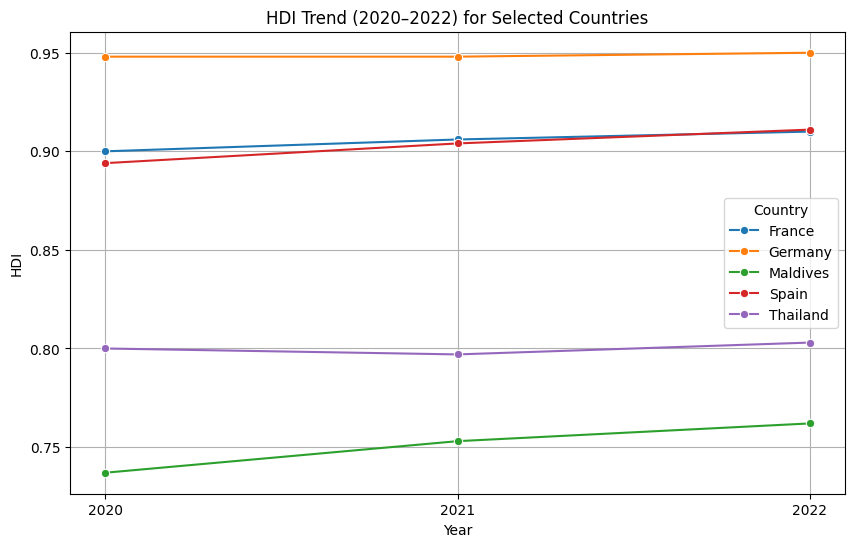

In [ ]:
countries = ['Spain', 'Thailand', 'Maldives', 'France', 'Germany']
df_countries = hdi_2020_2021_2022_df[hdi_2020_2021_2022_df['country'].isin(countries)]

# Line plot
plt.figure(figsize=(10,6))
sns.lineplot(data=df_countries, x='year', y='hdi', hue='country', marker='o')
plt.title('HDI Trend (2020–2022) for Selected Countries')
plt.xlabel('Year')
plt.ylabel('HDI')
plt.xticks([2020, 2021, 2022])
plt.legend(title='Country')
plt.grid(True)
plt.show()


#Bar Chart — Average HDI by Region
- Group dataset by Region and Year.  
- Compute mean HDI for each region-year pair.  
- Plot bar chart comparing average HDI across regions for 2020–2022.

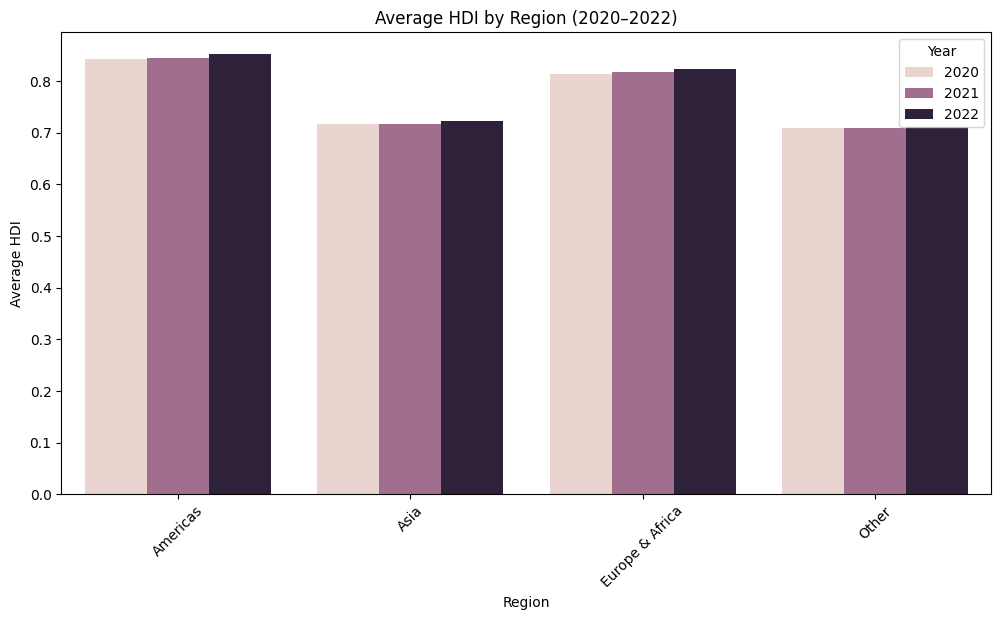

In [ ]:
# Group by region and year, compute mean HDI
def assign_region(country):
    asia = ["Afghanistan","Bangladesh","Bhutan","India","Maldives","Nepal","Pakistan","Sri Lanka",
            "China","Japan","Korea (Republic of)","Indonesia","Philippines","Thailand","Vietnam","Malaysia","Singapore"]
    europe_africa = ["Albania","Algeria","Andorra","Angola","Austria","Belgium","France","Germany","Italy","Spain","Greece","South Africa","Nigeria"]
    americas = ["United States","Canada","Brazil","Argentina","Mexico","Chile"]

    if country in asia:
        return "Asia"
    elif country in europe_africa:
        return "Europe & Africa"
    elif country in americas:
        return "Americas"
    else:
        return "Other"

hdi_2020_2021_2022_df['region'] = hdi_2020_2021_2022_df['country'].apply(assign_region)

avg_hdi_region = hdi_2020_2021_2022_df.groupby(['region', 'year'])['hdi'].mean().reset_index()


# Bar chart
plt.figure(figsize=(12,6))
sns.barplot(data=avg_hdi_region, x='region', y='hdi', hue='year')
plt.title('Average HDI by Region (2020–2022)')
plt.xlabel('Region')
plt.ylabel('Average HDI')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.show()


#Box Plot — HDI Distribution
- Create a box plot showing HDI spread for each year (2020, 2021, 2022).  
- Include titles and axis labels.  


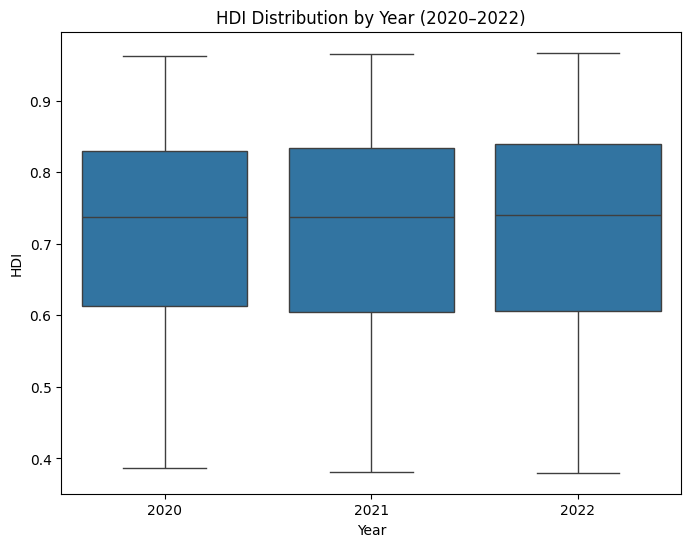

In [ ]:

plt.figure(figsize=(8,6))
sns.boxplot(data=hdi_2020_2021_2022_df, x='year', y='hdi')
plt.title('HDI Distribution by Year (2020–2022)')
plt.xlabel('Year')
plt.ylabel('HDI')
plt.show()


#Scatter Plot — HDI vs. GNI per Capita
- If GNI per Capita column exists, create scatter plot (x-axis: GNI per Capita, y-axis: HDI).  

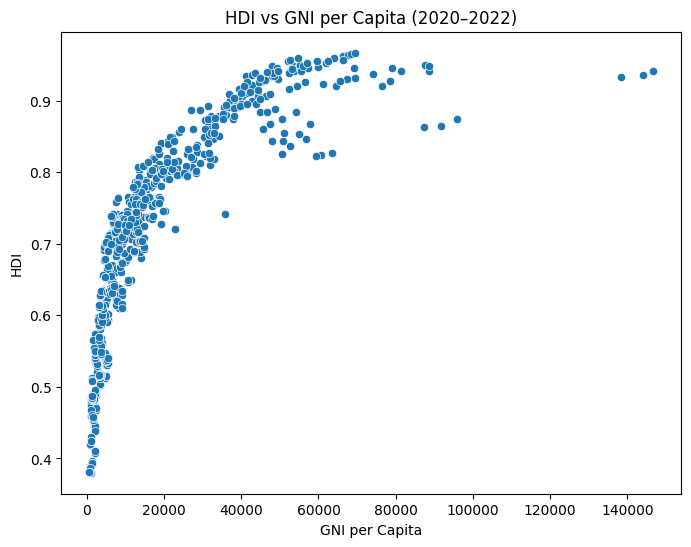

In [ ]:

if 'gross_inc_percap' in hdi_2020_2021_2022_df.columns:
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=hdi_2020_2021_2022_df, x='gross_inc_percap', y='hdi')
    plt.title('HDI vs GNI per Capita (2020–2022)')
    plt.xlabel('GNI per Capita')
    plt.ylabel('HDI')
    plt.show()
else:
    print("GNI per Capita variable not available in the dataset.")


#Short Analysis Questions:
**Which countries show the greatest improvement in HDI from 2020 to 2022?**

In [ ]:
hdi_2020 = hdi_2020_2021_2022_df[hdi_2020_2021_2022_df['year']==2020][['country','hdi']]
hdi_2022 = hdi_2020_2021_2022_df[hdi_2020_2021_2022_df['year']==2022][['country','hdi']]
hdi_change = hdi_2022.merge(hdi_2020, on='country', suffixes=('_2022','_2020'))
hdi_change['hdi_diff'] = hdi_change['hdi_2022'] - hdi_change['hdi_2020']
top_improvement = hdi_change.sort_values(by='hdi_diff', ascending=False).head(5)
print("The countries showing the greatest improvement in HDI from 2020 to 2022 are:")
print(top_improvement[['country','hdi_diff']])


The countries showing the greatest improvement in HDI from 2020 to 2022 are:
        country  hdi_diff
3       Andorra     0.041
10   Azerbaijan     0.038
50      Ecuador     0.031
105    Maldives     0.025
111      Mexico     0.024


**Did any countries experience a decline in HDI? Provide possible reasons.**

In [ ]:
decline = hdi_change[hdi_change['hdi_diff'] < 0]
print("Yes, some countries experienced decline in HDI. They are :")
print(decline[['country','hdi_diff']])


Yes, some countries experienced decline in HDI. They are :
                              country  hdi_diff
0                         Afghanistan    -0.026
4                              Angola    -0.003
8                           Australia    -0.002
17                             Belize    -0.005
24                  Brunei Darussalam    -0.004
25                           Bulgaria    -0.003
26                       Burkina Faso    -0.008
32           Central African Republic    -0.002
33                               Chad    -0.002
37                            Comoros    -0.002
38                              Congo    -0.005
40                         Costa Rica    -0.005
51                              Egypt    -0.001
56              Eswatini (Kingdom Of)    -0.012
61                              Gabon    -0.011
68                          Guatemala    -0.009
72                              Haiti    -0.005
84                            Jamaica    -0.001
86                           

**Which region has the highest and lowest average HDI across these three years?**

In [ ]:
avg_hdi_region = hdi_2020_2021_2022_df.groupby('region')['hdi'].mean().sort_values()
print(avg_hdi_region)
print("The region with the highest average HDI across 2020–2022 is Americas (0.846), and the region with the lowest average HDI is Other (0.710).")


region
Other              0.709600
Asia               0.718667
Europe & Africa    0.818615
Americas           0.846444
Name: hdi, dtype: float64
The region with the highest average HDI across 2020–2022 is Americas (0.846), and the region with the lowest average HDI is Other (0.710).


**Discuss how global events (e.g., the COVID-19 pandemic) may have affected HDI trends during
this period:**

It is expected that the trend in HDI during the period ranging from 2020 to 2022 might have been greatly influenced by the pandemic known as COVID-19. This is because many nations around the globe were affected in various sectors, which are core components of HDI, for example, healthcare, education, and income

Health: There were rises in mortality rates and difficulties in healthcare access, potentially reducing life expectancy for some nations.

Education: School closings and limitations to online education might have reduced the expected mean number of years of education.

Income: The slowing economy, loss of jobs, and decreasing GNI per capita in various countries impacted the living standards.

Consequently, rates of improvement or levels of decline in HDI in certain countries slowed or reversed, such as Afghanistan, Ukraine, and Timor-Leste, although those with effective approaches to the pandemic or robust economies experienced eventual improvement by 2022.

The pandemic, therefore, caused setbacks in human development in the short run, particularly for the low-income states, while the developed states were able to retain or slightly enhance the HDI

#Problem 2: Advanced HDI Exploration

### Task 1: Create South Asia Subset
- Defined the list of South Asian countries.
- Filtered the HDI dataset to include only these countries.
- Saved the filtered dataset as **HDI_SouthAsia.csv**.

In [ ]:
south_asia_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]
hdi_south_asia = data[data["country"].isin(south_asia_countries)].copy()
hdi_south_asia.to_csv("HDI_SouthAsia.csv", index=False)


### Task 2: Composite Development Score
- Normalized Life Expectancy and GNI per Capita to create indices.
- Calculated Composite Score = 0.30 × Life Expectancy Index + 0.30 × GNI Index.
- Ranked countries and plotted the top 5.
- Compared Composite Score with HDI rankings.


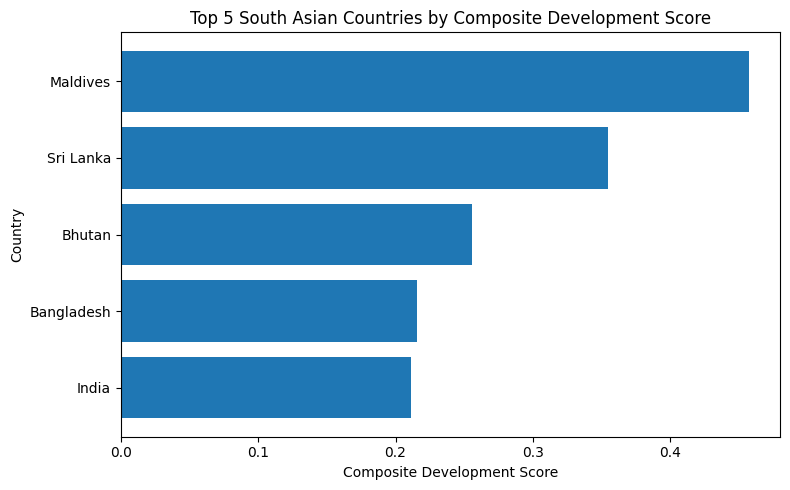

In [ ]:
# Normalize Life Expectancy
hdi_south_asia["life_expectancy_index"] = (
    (hdi_south_asia["life_expectancy"] - hdi_south_asia["life_expectancy"].min()) /
    (hdi_south_asia["life_expectancy"].max() - hdi_south_asia["life_expectancy"].min())
)

# Normalize GNI per Capita
hdi_south_asia["gni_index"] = (
    (hdi_south_asia["gross_inc_percap"] - hdi_south_asia["gross_inc_percap"].min()) /
    (hdi_south_asia["gross_inc_percap"].max() - hdi_south_asia["gross_inc_percap"].min())
)
hdi_south_asia["Composite_Score"] = (
    0.30 * hdi_south_asia["life_expectancy_index"] +
    0.30 * hdi_south_asia["gni_index"]
)
country_scores = (
    hdi_south_asia
    .groupby("country", as_index=False)
    .agg({
        "Composite_Score": "mean",
        "hdi": "mean"
    })
)

# Ranking
composite_rank = country_scores.sort_values("Composite_Score", ascending=False)
hdi_rank = country_scores.sort_values("hdi", ascending=False)
top5 = composite_rank.head(5)

plt.figure(figsize=(8,5))
plt.barh(top5["country"], top5["Composite_Score"])
plt.xlabel("Composite Development Score")
plt.ylabel("Country")
plt.title("Top 5 South Asian Countries by Composite Development Score")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


### Task 3: Outlier Detection
- Identified outliers in HDI and GNI per Capita using the 1.5 × IQR rule.
- Highlighted outliers in a scatter plot of GNI per Capita vs HDI.
- Observed countries that deviate significantly from the general trend.


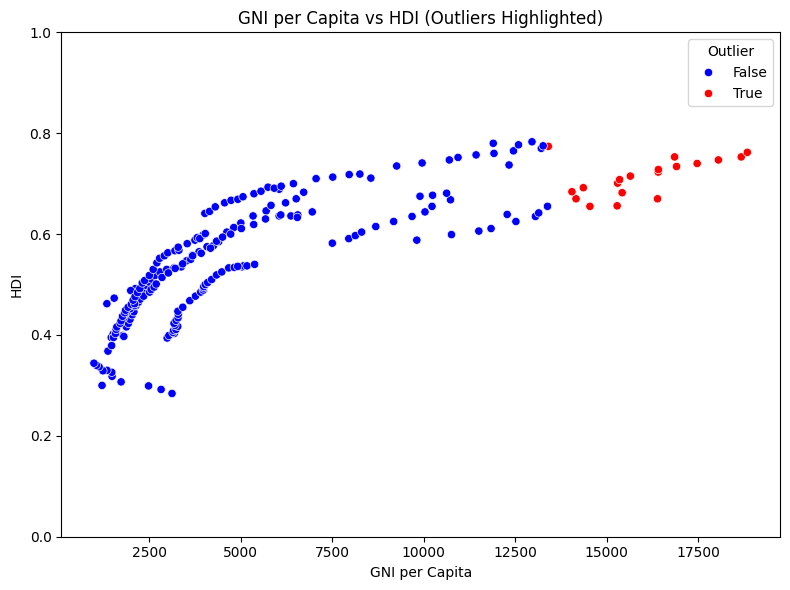

In [ ]:
def detect_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return (series < lower) | (series > upper)

hdi_south_asia["HDI_outlier"] = detect_outliers(hdi_south_asia["hdi"])
hdi_south_asia["GNI_outlier"] = detect_outliers(hdi_south_asia["gross_inc_percap"])
hdi_south_asia["Outlier"] = hdi_south_asia["HDI_outlier"] | hdi_south_asia["GNI_outlier"]

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=hdi_south_asia,
    x="gross_inc_percap",
    y="hdi",
    hue="Outlier",
    palette={False: "blue", True: "red"}
)
plt.title("GNI per Capita vs HDI (Outliers Highlighted)")
plt.xlabel("GNI per Capita")
plt.ylabel("HDI")
plt.ylim(0,1)
plt.tight_layout()
plt.show()


### Task 4: Exploring Metric Relationships
- Calculated Pearson correlation of Gender Development Index and Life Expectancy Index with HDI.
- Created scatter plots with trendlines to visualize relationships.
- Observed which metric is most strongly and weakly related to HDI.


Pearson correlation between gender_development and HDI: 0.866
Pearson correlation between life_expectancy and HDI: 0.959


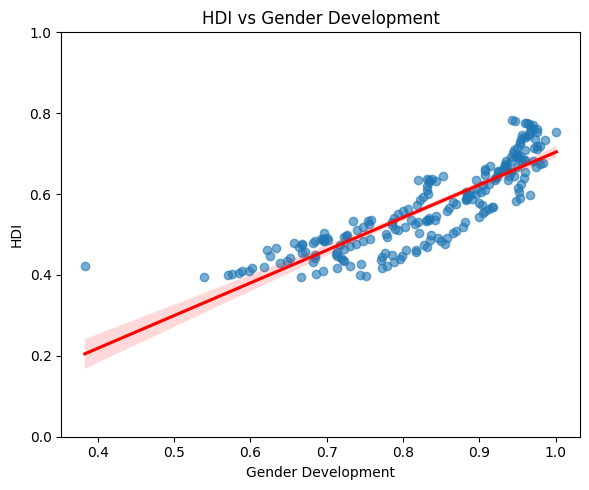

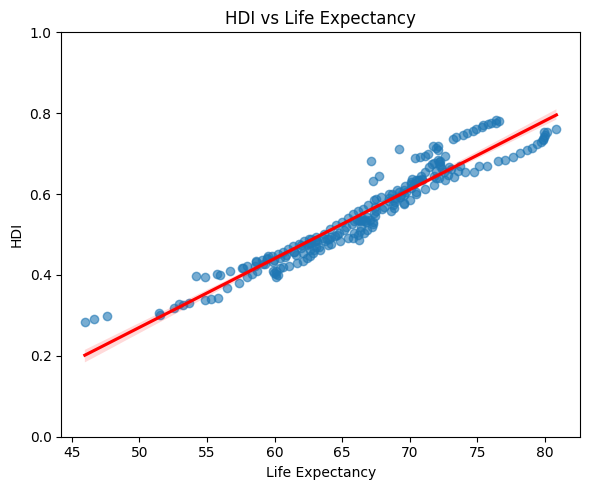

In [ ]:
metrics = ["gender_development", "life_expectancy"]

for metric in metrics:
    corr = hdi_south_asia[metric].corr(hdi_south_asia["hdi"])
    print(f"Pearson correlation between {metric} and HDI: {corr:.3f}")

for metric in metrics:
    plt.figure(figsize=(6,5))
    sns.regplot(
        data=hdi_south_asia,
        x=metric,
        y="hdi",
        scatter_kws={"alpha":0.6},
        line_kws={"color":"red"}
    )
    plt.title(f"HDI vs {metric.replace('_', ' ').title()}")
    plt.xlabel(metric.replace("_", " ").title())
    plt.ylabel("HDI")
    plt.ylim(0,1)
    plt.tight_layout()
    plt.show()

### Task 5: Gap Analysis
- Created a new metric: GNI–HDI Gap = "gross inc percap" − "hdi".
- Ranked South Asian countries by GNI–HDI Gap in descending and ascending order.
- Plotted the top 3 positive gaps and top 3 negative gaps.
- Observed implications where GNI is high but HDI is lower than expected, and vice versa.


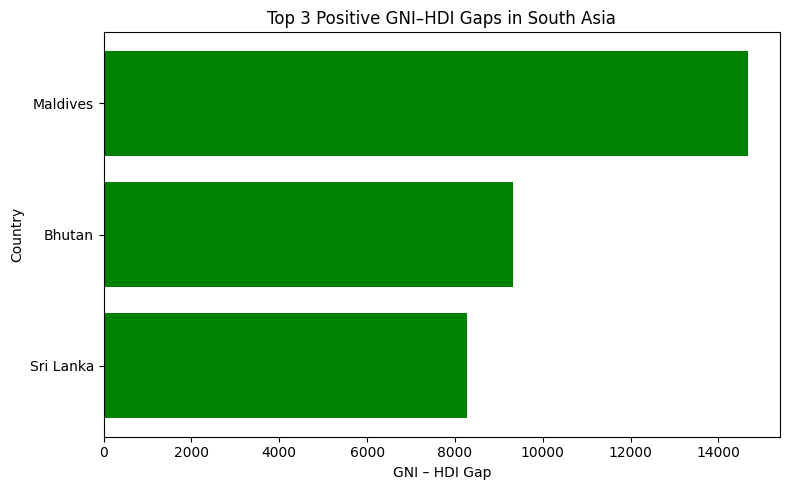

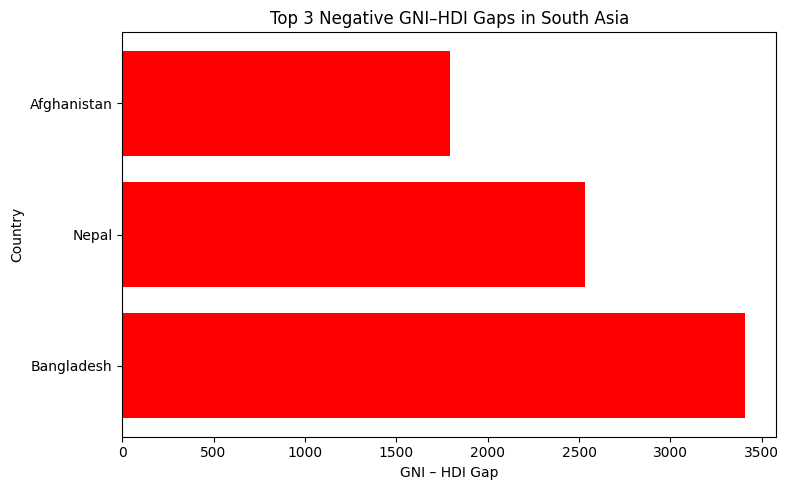

In [ ]:

hdi_south_asia = hdi_south_asia.copy()

# Create GNI-HDI Gap
hdi_south_asia["GNI_HDI_Gap"] = hdi_south_asia["gross_inc_percap"] - hdi_south_asia["hdi"]

# Aggregate by country
gap_summary = hdi_south_asia.groupby("country", as_index=False).agg({
    "GNI_HDI_Gap": "mean"
})

# Top 3 positive gaps (GNI > HDI)
top_positive_gaps = gap_summary.sort_values(by="GNI_HDI_Gap", ascending=False).head(3)

# Top 3 negative gaps (HDI > GNI)
top_negative_gaps = gap_summary.sort_values(by="GNI_HDI_Gap", ascending=True).head(3)

# Plot top positive gaps
plt.figure(figsize=(8,5))
plt.barh(top_positive_gaps["country"], top_positive_gaps["GNI_HDI_Gap"], color="green")
plt.xlabel("GNI – HDI Gap")
plt.ylabel("Country")
plt.title("Top 3 Positive GNI–HDI Gaps in South Asia")
plt.gca().invert_yaxis()  # largest gap on top
plt.tight_layout()
plt.show()

# Plot top negative gaps
plt.figure(figsize=(8,5))
plt.barh(top_negative_gaps["country"], top_negative_gaps["GNI_HDI_Gap"], color="red")
plt.xlabel("GNI – HDI Gap")
plt.ylabel("Country")
plt.title("Top 3 Negative GNI–HDI Gaps in South Asia")
plt.gca().invert_yaxis()  # smallest gap on top
plt.tight_layout()
plt.show()


## Problem 3: Comparative Regional Analysis – South Asia vs Middle East


### Task 1: Create Middle East and South Asia Subsets
- Defined country lists for South Asia and Middle East.
- Filtered the 2020–2022 dataset to create regional subsets.
- Saved subsets as `HDI_SouthAsia_2020_2022.csv` and `HDI_MiddleEast_2020_2022.csv`.


In [ ]:
# Define South Asia and Middle East country lists
south_asia = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

middle_east = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait",
    "Lebanon", "Oman", "Palestine", "Qatar",
    "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]

# Filter for years 2020, 2021, 2022
df_2020_2022 = hdi_2020_2021_2022_df[hdi_2020_2021_2022_df["year"].isin([2020, 2021, 2022])]

# Create subsets
df_sa = df_2020_2022[df_2020_2022["country"].isin(south_asia)].copy()
df_me = df_2020_2022[df_2020_2022["country"].isin(middle_east)].copy()

# Save subsets
df_sa.to_csv("HDI_SouthAsia_2020_2022.csv", index=False)
df_me.to_csv("HDI_MiddleEast_2020_2022.csv", index=False)

print("South Asia and Middle East subsets saved successfully.")


South Asia and Middle East subsets saved successfully.


### Task 2: Descriptive Statistics
- Computed mean and standard deviation of HDI for South Asia and Middle East (2020–2022).
- Compared the average HDI to identify which region performs better.


In [ ]:
# Compute mean and standard deviation of HDI for each region
sa_hdi_mean = df_sa["hdi"].mean()
sa_hdi_std = df_sa["hdi"].std()

me_hdi_mean = df_me["hdi"].mean()
me_hdi_std = df_me["hdi"].std()

print("South Asia HDI (2020-2022):")
print(f"Mean: {sa_hdi_mean:.3f}, Standard Deviation: {sa_hdi_std:.3f}\n")

print("Middle East HDI (2020-2022):")
print(f"Mean: {me_hdi_mean:.3f}, Standard Deviation: {me_hdi_std:.3f}\n")

# Compare which region performs better
if sa_hdi_mean > me_hdi_mean:
    print("On average, South Asia performs better in HDI.")
elif me_hdi_mean > sa_hdi_mean:
    print("On average, Middle East performs better in HDI.")
else:
    print("Both regions have the same average HDI.")


South Asia HDI (2020-2022):
Mean: 0.640, Standard Deviation: 0.098

Middle East HDI (2020-2022):
Mean: 0.789, Standard Deviation: 0.141

On average, Middle East performs better in HDI.


### Task 3: Top and Bottom Performers
- Identified the top 3 and bottom 3 countries in each region based on average HDI (2020–2022).
- Compared top and bottom performers across South Asia and the Middle East using a bar chart.


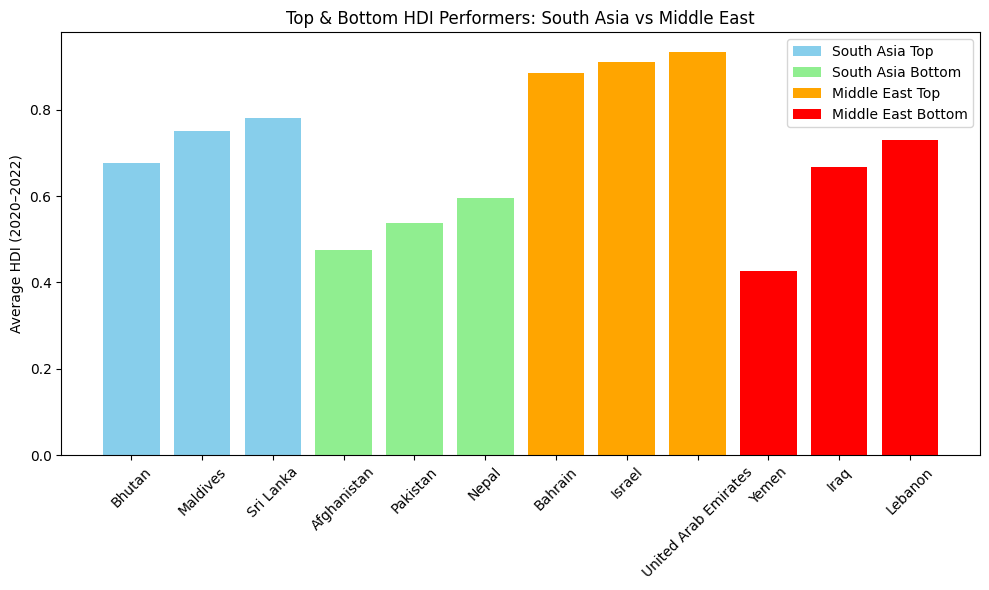

In [ ]:

# Compute average HDI for each country
sa_avg = df_sa.groupby("country")["hdi"].mean().sort_values()
me_avg = df_me.groupby("country")["hdi"].mean().sort_values()

# Identify top 3 and bottom 3 countries
sa_bottom3, sa_top3 = sa_avg.head(3), sa_avg.tail(3)
me_bottom3, me_top3 = me_avg.head(3), me_avg.tail(3)

plt.figure(figsize=(10,6))

# South Asia bars
plt.bar(sa_top3.index, sa_top3.values, label="South Asia Top", color="skyblue")
plt.bar(sa_bottom3.index, sa_bottom3.values, label="South Asia Bottom", color="lightgreen")

# Middle East bars
plt.bar(me_top3.index, me_top3.values, label="Middle East Top", color="orange")
plt.bar(me_bottom3.index, me_bottom3.values, label="Middle East Bottom", color="red")

plt.ylabel("Average HDI (2020–2022)")
plt.title("Top & Bottom HDI Performers: South Asia vs Middle East")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



### Task 4: Metric Comparisons
- Compared average Gender Development Index, Life Expectancy Index, and GNI per Capita across South Asia and Middle East.
- Visualized disparities between the regions using a grouped bar chart.
- Identified which metric shows the largest difference between the two regions.


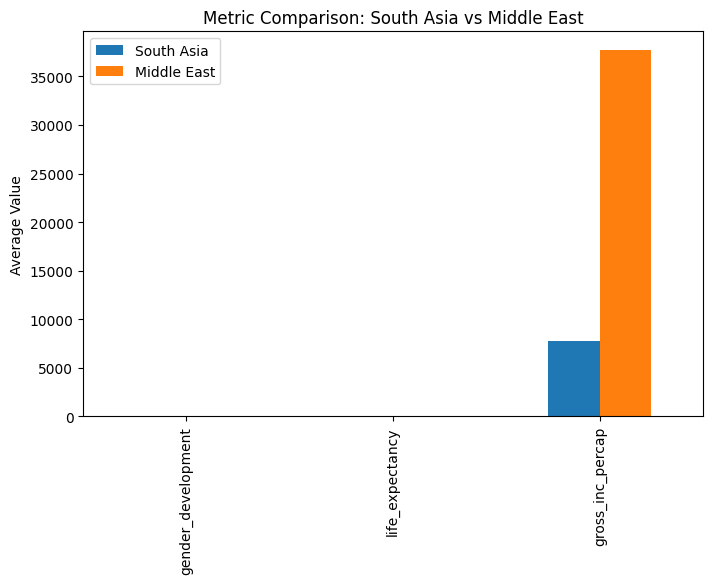

In [ ]:

metrics = ["gender_development", "life_expectancy", "gross_inc_percap"]

sa_means = df_sa[metrics].mean()
me_means = df_me[metrics].mean()

comparison = pd.DataFrame({
    "South Asia": sa_means,
    "Middle East": me_means
})

comparison.plot(kind="bar", figsize=(8,5))
plt.title("Metric Comparison: South Asia vs Middle East")
plt.ylabel("Average Value")
plt.show()


### Task 5: HDI Disparity
- Computed the **range** (max – min) of HDI for South Asia and Middle East.
- Calculated the **coefficient of variation (CV = std/mean)** for HDI in both regions.
- Determined which region exhibits more variation in HDI.


In [ ]:
# Compute mean and standard deviation for HDI
sa_mean = df_sa["hdi"].mean()
sa_std = df_sa["hdi"].std()

me_mean = df_me["hdi"].mean()
me_std = df_me["hdi"].std()

# Compute HDI range
sa_range = df_sa["hdi"].max() - df_sa["hdi"].min()
me_range = df_me["hdi"].max() - df_me["hdi"].min()

# Compute coefficient of variation (CV)
sa_cv = sa_std / sa_mean
me_cv = me_std / me_mean

# Print results
print("South Asia Range:", sa_range, "CV:", sa_cv)
print("Middle East Range:", me_range, "CV:", me_cv)

# Identify region with more variation
if sa_cv > me_cv:
    print("South Asia exhibits more variation in HDI.")
else:
    print("Middle East exhibits more variation in HDI.")


South Asia Range: 0.321 CV: 0.1536520924690084
Middle East Range: 0.5130000000000001 CV: 0.17910145193048382
Middle East exhibits more variation in HDI.


### Task 6: Correlation Analysis
- Computed **Pearson correlations** of HDI with Gender Development Index and Life Expectancy Index for South Asia and Middle East.
- Visualized relationships using scatter plots with trendlines.
- Observed the **strength and direction** of these correlations to identify which metric is more strongly related to HDI.



South Asia correlations:
gender_development vs HDI: 0.874


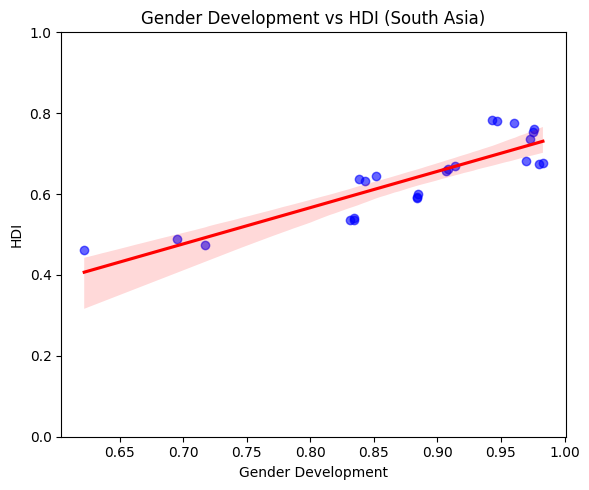

life_expectancy vs HDI: 0.939


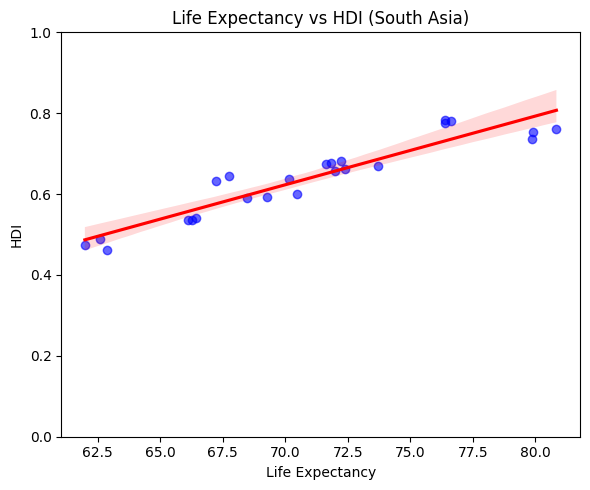


Middle East correlations:
gender_development vs HDI: 0.936


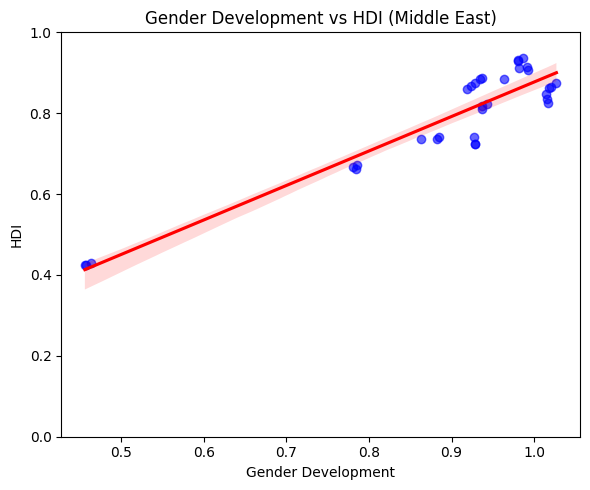

life_expectancy vs HDI: 0.933


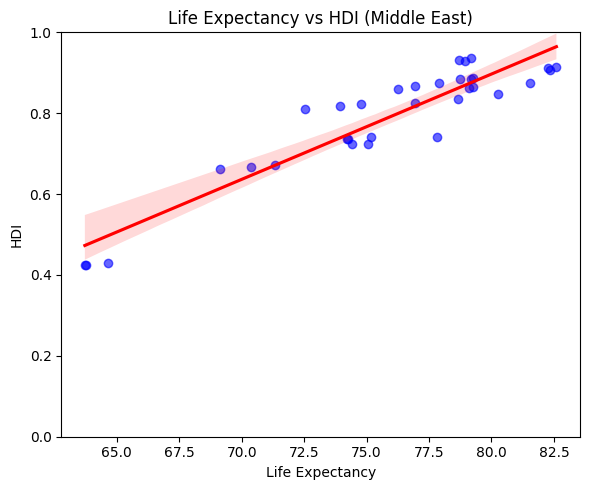

In [ ]:
metrics_corr = ["gender_development", "life_expectancy"]

for region_name, df in [("South Asia", df_sa), ("Middle East", df_me)]:
    print(f"\n{region_name} correlations:")
    for metric in metrics_corr:
        corr = df[metric].corr(df["hdi"])
        print(f"{metric} vs HDI: {corr:.3f}")

        plt.figure(figsize=(6,5))
        sns.regplot(
            data=df,
            x=metric,
            y="hdi",
            scatter_kws={"alpha":0.6, "color":"blue"},
            line_kws={"color":"red"}
        )
        plt.title(f"{metric.replace('_',' ').title()} vs HDI ({region_name})")
        plt.xlabel(metric.replace("_"," ").title())
        plt.ylabel("HDI")
        plt.ylim(0,1)
        plt.tight_layout()
        plt.show()


### Task 7: Outlier Detection
- Detected outliers in HDI and GNI per Capita for South Asia and Middle East using the 1.5 × IQR rule.
- Highlighted the outliers in scatter plots of GNI per Capita vs HDI.
- Observed countries that deviate significantly from the general trend, indicating unusually high or low development relative to income.



South Asia outliers:


,country,year,hdi,gross_inc_percap
3511,Maldives,2003,0.655,14543.14634
3512,Maldives,2004,0.656,15287.20714
3514,Maldives,2006,0.670,16391.40757
3515,Maldives,2007,0.670,14162.42816
3516,Maldives,2008,0.682,15423.81910
3517,Maldives,2009,0.684,14050.92438
3518,Maldives,2010,0.692,14363.23615
3519,Maldives,2011,0.701,15300.31364
3520,Maldives,2012,0.708,15355.44089
3521,Maldives,2013,0.715,15648.36655


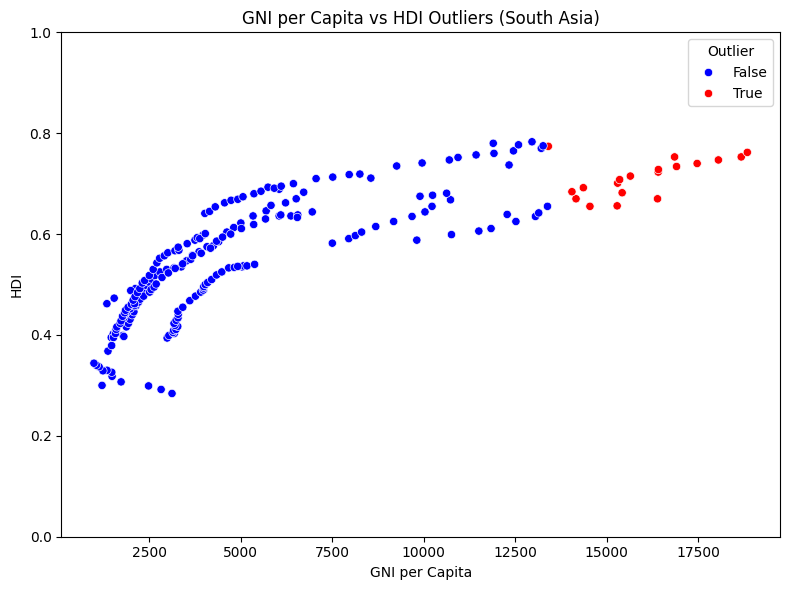


Middle East outliers:


,country,year,hdi,gross_inc_percap
6366,Yemen,2020,0.430,1152.015672
6367,Yemen,2021,0.425,1112.162989
6368,Yemen,2022,0.424,1105.763435


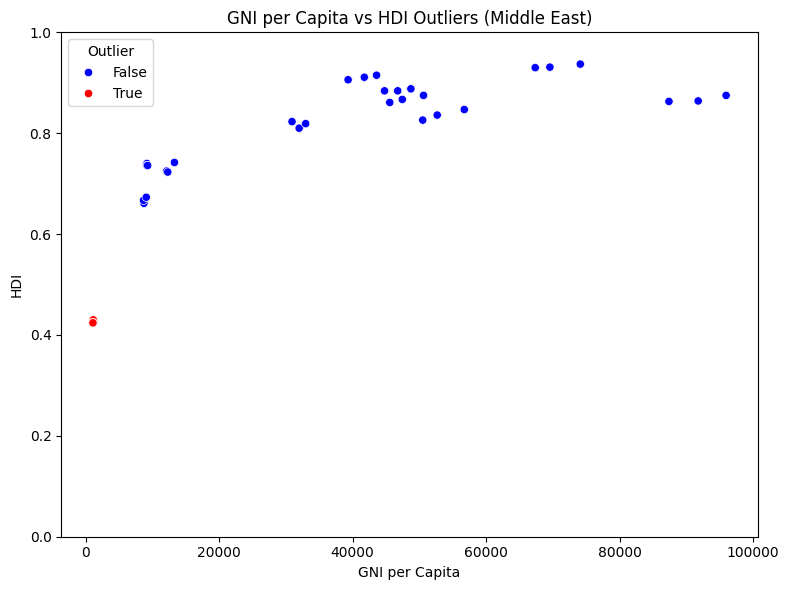

In [ ]:
def detect_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    return (series < lower) | (series > upper)

for region_name, df in [("South Asia", hdi_south_asia), ("Middle East", df_me)]:
    df = df.copy()
    df["HDI_outlier"] = detect_outliers(df["hdi"])
    df["GNI_outlier"] = detect_outliers(df["gross_inc_percap"])
    df["Outlier"] = df["HDI_outlier"] | df["GNI_outlier"]

    print(f"\n{region_name} outliers:")
    display(df[df["Outlier"]][["country", "year", "hdi", "gross_inc_percap"]])

    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df, x="gross_inc_percap", y="hdi", hue="Outlier", palette={False:"blue", True:"red"})
    plt.title(f"GNI per Capita vs HDI Outliers ({region_name})")
    plt.xlabel("GNI per Capita")
    plt.ylabel("HDI")
    plt.ylim(0,1)
    plt.tight_layout()
    plt.show()